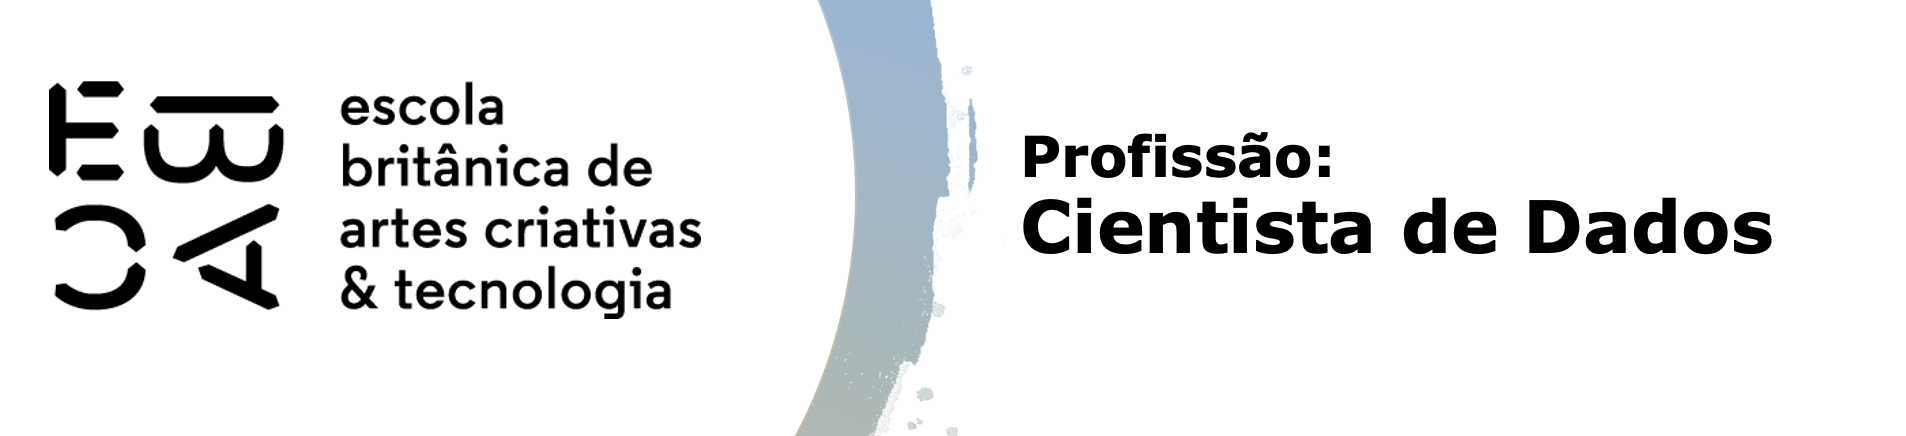

# Tarefa 01

## 1. Montar um passo a passo para o bagging

Bagging (abreviação de Bootstrap Aggregating) é uma técnica de ensemble learning usada para melhorar a estabilidade e a acurácia de algoritmos de aprendizado de máquina, principalmente os que tendem a sofrer com alta variância, como árvores de decisão. A ideia principal do bagging é reduzir o erro do modelo combinando múltiplas versões do mesmo modelo treinadas em diferentes subconjuntos dos dados.

###  Passo a Passo do Bagging
1. **Geração de Amostras Bootstrap:**

    - A partir do conjunto de dados original com n observações, são geradas 
      m amostras bootstrap. Cada amostra bootstrap é criada selecionando 
    n exemplos aleatoriamente do conjunto de dados original, com reposição. Isso   significa que algumas amostras podem aparecer múltiplas vezes em uma amostra bootstrap, enquanto outras podem não aparecer.

2. **Treinamento dos Modelos:**

    - Para cada uma das m amostras bootstrap, treina-se um modelo separado e independente. Esses modelos são geralmente idênticos em termos de estrutura (por exemplo, múltiplas árvores de decisão), mas, como cada modelo é treinado em um conjunto diferente de dados, eles irão aprender diferentes padrões.

3. **Agregação das Predições:**

    - Para fazer a previsão final no caso de problemas de classificação, o bagging usa a votação majoritária (ou seja, a classe que recebe o maior número de votos dos modelos é a classe predita). No caso de regressão, a previsão final é dada pela média das predições dos diferentes modelos.

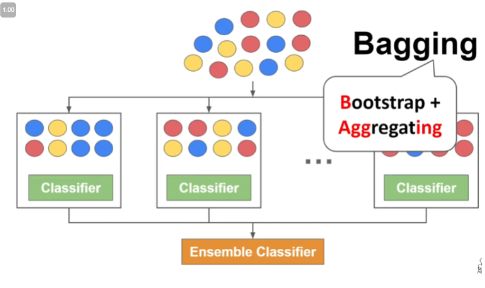

#### Exemplo Clássico: Random Forest
O *Random Forest* é um exemplo popular de bagging aplicado a árvores de decisão. Ele constrói uma floresta de árvores de decisão usando diferentes amostras bootstrap do conjunto de dados original e, em cada nó da árvore, usa um subconjunto aleatório de características para determinar o melhor split.

## Explicar com o que compreendi o que é Bagging

Bagging é uma técnica para melhorar modelos de aprendizado de máquina, especialmente aqueles que podem mudar muito se os dados de treinamento mudarem um pouco (isso se chama alta variância).

- Bagging (que significa "Bootstrap Aggregating") pega a ideia de criar várias versões de um modelo e, em vez de usar apenas um modelo, combina os resultados de vários para fazer uma previsão mais estável e precisa.

#### Passo a Passo Simples com Exemplo

1. **Amostras Bootstrap:**
    - magine que você tem um dataframe (df) com 50 linhas. O primeiro passo do bagging é criar várias "amostras bootstrap".
    - Para cada amostra bootstrap, você vai escolher aleatoriamente 50 linhas do seu dataframe, com reposição (ou seja, uma linha pode ser escolhida mais de uma vez, e outras podem ser deixadas de fora).
    - Suponha que você crie 5 amostras bootstrap (poderiam ser mais ou menos, depende do que você quer).
    - Exemplo: Uma amostra bootstrap poderia ter as linhas 3, 7, 7, 22, 22, 15, 50, 50... e assim por diante, até ter 50 linhas.

---
2. **Treinamento dos Modelos(Base learners):**
   - Para cada uma dessas 5 amostras bootstrap, você treina um modelo separado. Então, se você usar árvores de decisão, vai treinar 5 árvores diferentes, uma para cada amostra bootstrap.
   - Como cada modelo é treinado com dados ligeiramente diferentes, eles aprendem coisas ligeiramente diferentes.

---
3. **Agregações(Aggregating):**
   - Agora, para prever algo novo, você pede a cada um dos 5 modelos para fazer uma previsão
   - Se for classificação: Você faz uma votação entre os modelos. A classe que tiver mais votos é a predição final
   - Se for regressão: Você faz a média das predições dos 5 modelos.

## Passo 1: Bootstrap

In [69]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.utils import resample

# Carregar o dataset Iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

# Número de modelos (amostras bootstrap)
n_models = 5
bootstrap_samples = []

# Criar amostras bootstrap
for _ in range(n_models):
    X_sample, y_sample = resample(X, y, replace=True, n_samples=len(X))
    bootstrap_samples.append((X_sample, y_sample))


## Passo 2: Modelagem

In [71]:
from sklearn.tree import DecisionTreeClassifier

models = []

# Treinar um modelo em cada amostra bootstrap
for X_sample, y_sample in bootstrap_samples:
    model = DecisionTreeClassifier()
    model.fit(X_sample, y_sample)
    models.append(model)


## Passo 3: Agregação

In [73]:
from scipy.stats import mode

# Fazer predições com cada modelo
predictions = np.zeros((X.shape[0], n_models))

for i, model in enumerate(models):
    predictions[:, i] = model.predict(X)

# Votação majoritária para classificação
final_predictions = mode(predictions, axis=1)[0].flatten()

# Avaliação
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y, final_predictions)
print(f"Acurácia do modelo Bagging: {accuracy:.2f}")


Acurácia do modelo Bagging: 0.98


## Explicação do Código

1. **Bootstrap:**
   - Criamos 5 amostras bootstrap a partir do conjunto de dados original, utilizando a função `resample` do Scikit-learn. Cada amostra contém o mesmo número de exemplos que o conjunto de dados original, mas com reposição, o que significa que algumas linhas podem ser repetidas enquanto outras podem ser omitidas.

2. **Modelagem:**
   - Para cada amostra bootstrap, treinamos um modelo de árvore de decisão (usando `DecisionTreeClassifier`). Isso resulta em 5 modelos diferentes.

3. **Agregação:**
   - Cada modelo faz predições para todas as amostras do conjunto de dados original. Depois, agregamos as predições usando votação majoritária para classificação (usando `mode` do Scipy). Para regressão, você usaria a média das predições.
   - Por fim, calculamos a acurácia do modelo bagging em relação aos valores reais.

Essa é uma implementação básica que ilustra o funcionamento do Bagging. Para problemas mais complexos, você pode ajustar os modelos, o número de amostras bootstrap, e as técnicas de agregação para otimizar o desempenho.
